# Stats, Plots + Prediction Demo

## Imports and setup

In [242]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pickle
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from NLP_Functions import *

In [244]:
# Importing the dataset (15k sample)
df = pd.read_json('Datasets/comments_processed_15ksample.json')
df.drop('Target_NPS', axis = 1, inplace = True)  # dropping this column as I won't use it
df.head()

,Title,Platform,Userscore,Comment,Username,Target,Comments_Processed
0,Super Smash Bros. for Wii U,WiiU,9,"This game is amazing, improves in every aspect...",Zin_49,Positive,"[game, amaz, improv, everi, aspect, previou, s..."
1,Zero Escape: Zero Time Dilemma,3DS,8,A bunch of bootleg robotic versions of the mai...,Techbane,Negative,"[bunch, bootleg, robot, version, main, charact..."
2,Metro: Last Light,PC,6,I liked the original this is some innovation b...,gstiker5,Negative,"[like, origin, innov, silent, main, charact, e..."
3,PlanetSide 2,PC,5,Planetside 2 has battles of epic scale and de...,NasseSeta,Negative,"[planetsid, battl, epic, scale, decent, gfx, g..."
4,Diablo III,PC,1,Game looks good and overall i like the graphic...,JamesLFranco,Negative,"[game, look, good, overal, like, graphic, game..."


## Loading the saved model and most_common words

In [245]:
# Loading the trained model on these 15k samples
classifier_f = open('Logistic_Regression_15k.pickle', 'rb')
classifier = pickle.load(classifier_f)
classifier_f.close()

# Loading the most_common
most_common_f = open('10kmost_common_15ksample.pickle', 'rb')
most_common = pickle.load(most_common_f)
most_common_f.close()

In [296]:
# Checking the model's accuracy again
print('Logistic Regression accuracy:', str(round(nltk.classify.accuracy(classifier, testing_set) * 100, 2)) + '%')

Logistic Regression accuracy: 79.0%


## Initializing variables to get a prediction's list

In [248]:
# Note to self: should've exported this matrix as well

# Building the features and making the matrix
matrix = make_matrix(df['Comment'], df['Target'], most_common)

# Defining the size to use for the training and testing
size = int(len(matrix) * 0.20)

# Training with 80% of the data and testing against the remaining 20%
training_set = matrix[size:]
testing_set = matrix[:size]

In [249]:
# Extracting the testing_set labels to compare with the model's prediction
test_labels = [testing_set[i][1] for i in range(len(testing_set))]
print(test_labels.count('Positive'))  # 1748
print(test_labels.count('Negative'))  # 1252

1748
1252


In [250]:
# Getting the model's predictions
pred_list = [classifier.classify(testing_set[i][0]) for i in range(len(testing_set))]
print(pred_list.count('Positive'))  # 1802
print(pred_list.count('Negative'))  # 1198

1802
1198


## Plots

### Actual vs Predicted Labels Comparisson

'DO A T TEST ON THE MEANS OF THEM OR SOMETHING, TO COMPARE!!!!'

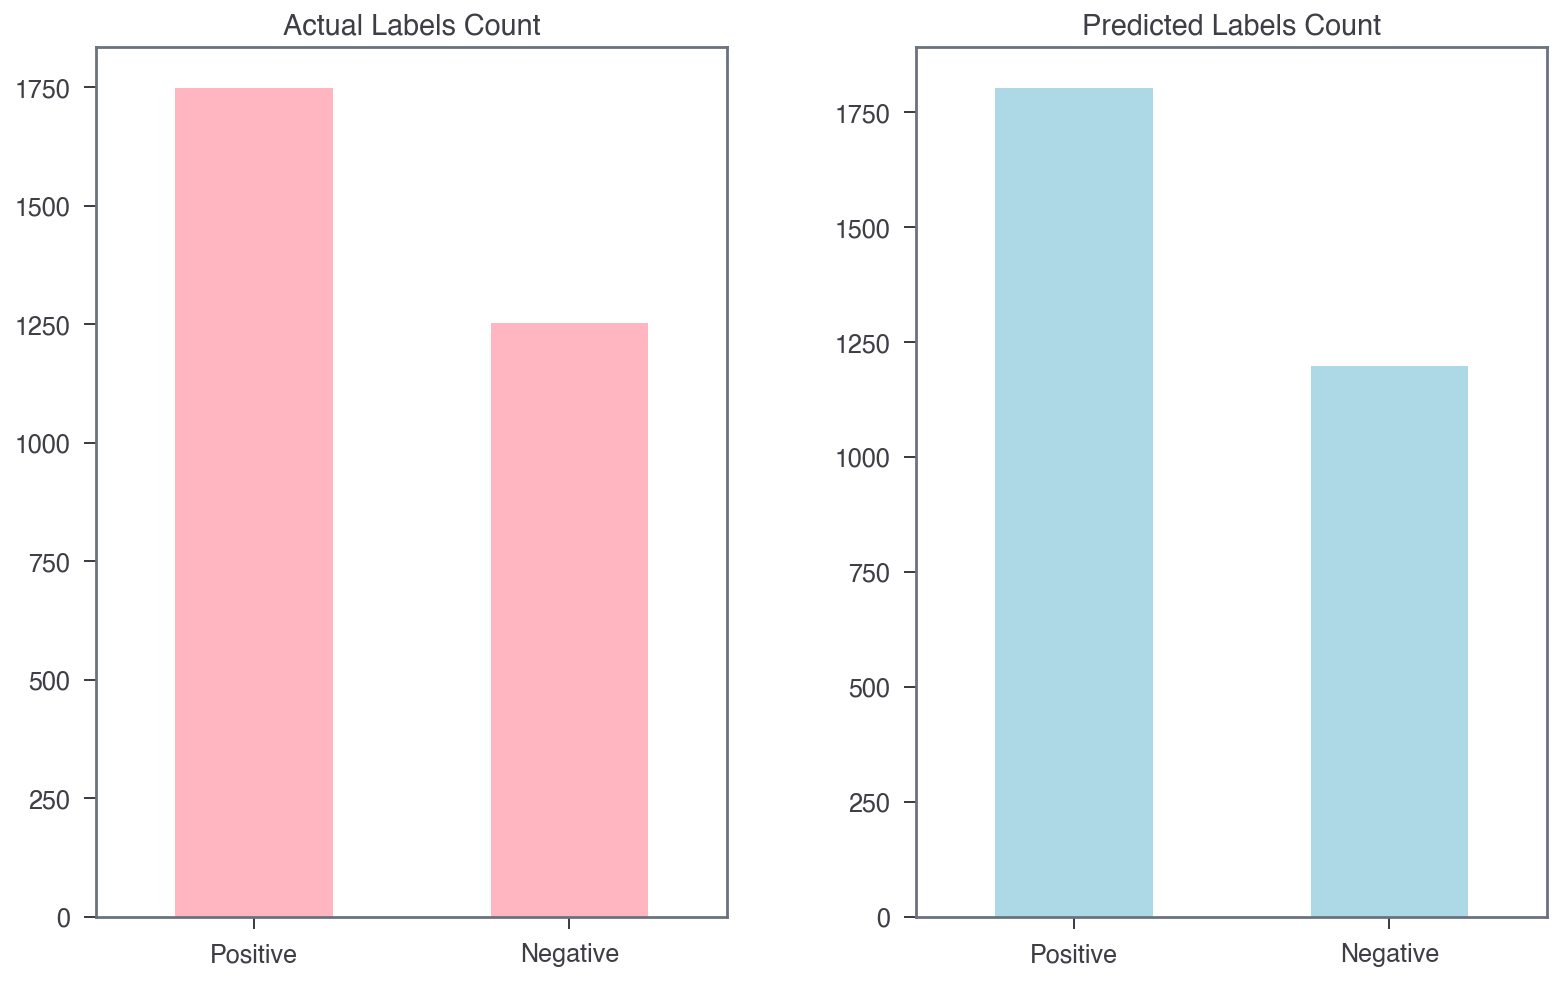

In [295]:
actual_vs_preds_df = pd.DataFrame({'Actual': test_labels, 'Predictions': pred_list})
actual_vs_preds_df

fig, axs = plt.subplots(1, 2, figsize = (13, 8))
plt.subplots_adjust(wspace = 0.3)

actual_vs_preds_df['Actual'].value_counts().plot(kind = 'bar', rot = 0, ax = axs[0], color = 'lightpink')
axs[0].set_title('Actual Labels Count')
#axs[0].set_ylabel('Count')

actual_vs_preds_df['Predictions'].value_counts().plot(kind = 'bar', rot = 0, ax = axs[1], color = 'lightblue')
#axs[1].set_ylabel('Count')
axs[1].set_title('Predicted Labels Count');

'''DO A T TEST ON THE MEANS OF THEM OR SOMETHING, TO COMPARE!!!!'''

In [259]:
print(actual_vs_preds_df['Actual'].value_counts(), '\n')
print(actual_vs_preds_df['Predictions'].value_counts(), '\n')

Positive    1748
Negative    1252
Name: Actual, dtype: int64 

Positive    1802
Negative    1198
Name: Predictions, dtype: int64 



### Most Common Words

In [297]:
# Extracting the words and their counts from the most_common list of tuples and turning it into a DF to plot
most_common_words = [x for x, y in most_common]
most_common_counts = [y for x, y in most_common]

words_df = pd.DataFrame({'Most_Common_Words': most_common_words, 'Count': most_common_counts})
words_df

,Most_Common_Words,Count
0,game,62369
1,play,16498
2,like,11873
3,one,9181
4,stori,8506
...,...,...
9995,wic,4
9996,cuento,4
9997,sitio,4
9998,mientra,4


### Top 10 Most Common Words

In [284]:
sns.set_palette('pastel')

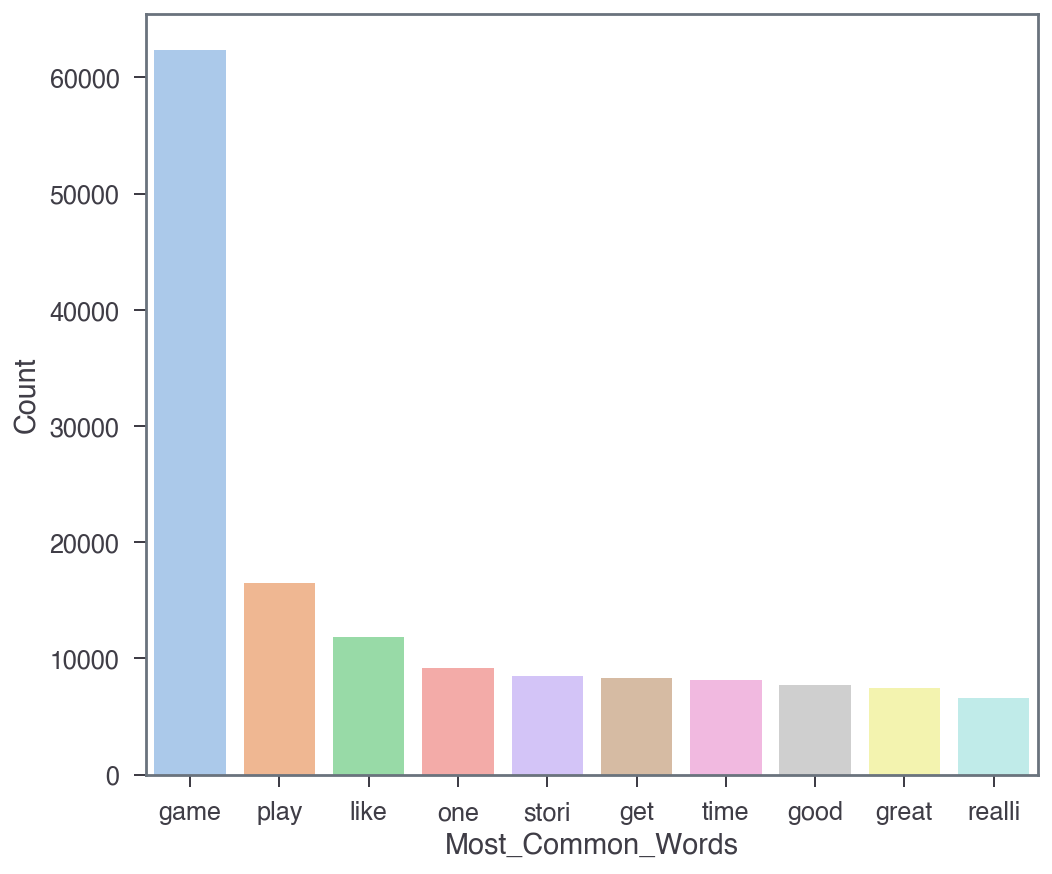

In [285]:
# Plotting the top 10 most common words
sns.barplot(x = 'Most_Common_Words', y = 'Count', data = words_df[:10]);

### Average Userscore Distribution

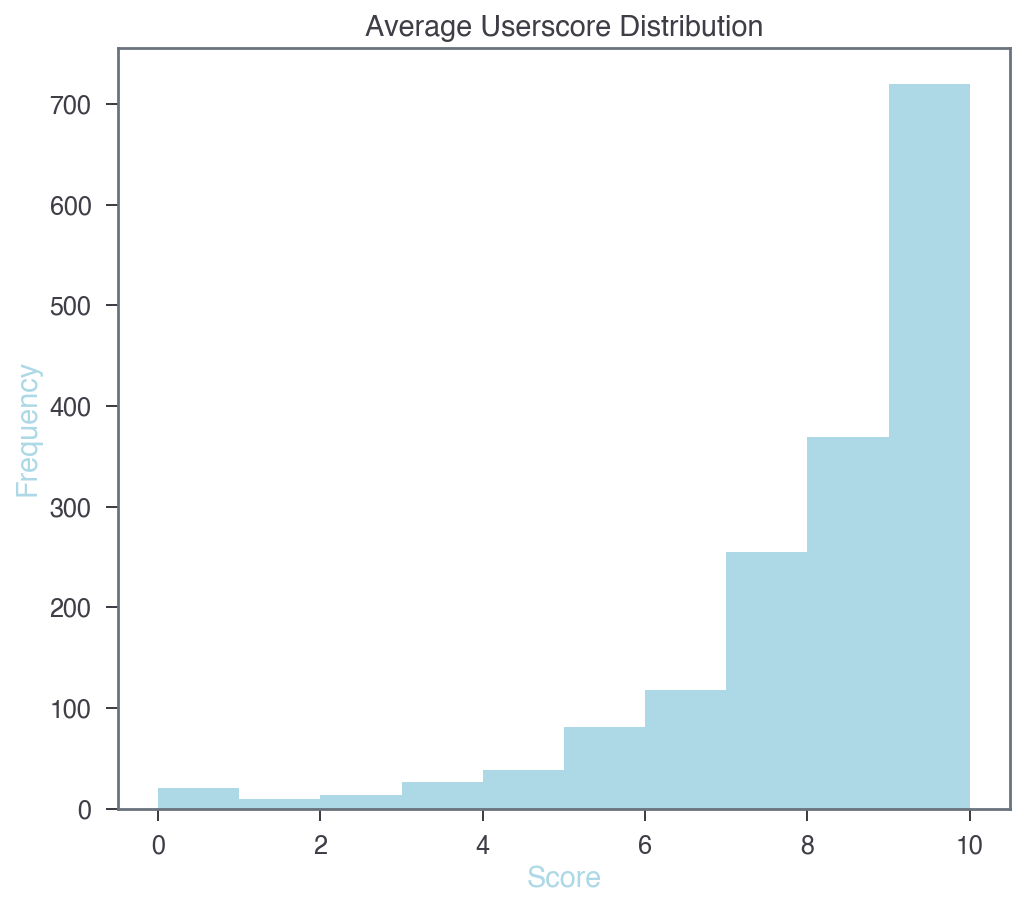

In [291]:
# Getting the avg_scores via groupby
avg_scores = df.groupby('Title', as_index = False).mean()
avg_scores['Userscore'] = avg_scores['Userscore'].apply(lambda x: round(x, 2))  # just rounding up to 2 dec. places

# Plotting
avg_scores.hist(color = 'lightblue', grid = False)
plt.ylabel('Frequency', color = 'lightblue')
plt.xlabel('Score', color = 'lightblue')
plt.title('Average Userscore Distribution');

In [ ]:
# Simple prediction function that will be applied to the DF
def simple_pred(text):
    prediction = find_features(text, most_common)
    return classifier.classify(prediction)

# Don't know if it is interesting doing this or not, since the model trained on 80% of this data...
df['Predictions'] = df['Comment'].apply(simple_pred)  # could've done in a single line with lambda, but whatever

In [161]:
df[3000:]

,Title,Platform,Userscore,Comment,Username,Target,Predictions
3000,The Sly Collection,PlayStation3,4,the first game 6/10the second game 3/10the thi...,Inuit_Dude,Negative,Negative
3001,Sid Meier's Civilization V,PC,10,I bought it for 75% off and I also have an ext...,Xsonic,Positive,Positive
3002,BioShock Infinite,PC,9,What can I say about this game that hasn't alr...,saucyninja007,Positive,Positive
3003,Call of Duty: Black Ops II,Xbox360,9,Black Ops 2 is a very enjoyable game that is f...,gingerclown,Positive,Negative
3004,Guild Wars,PC,9,Amazing. I have been playing Guild Wars since...,PhilipBS,Positive,Positive
...,...,...,...,...,...,...,...
14995,Halo: Reach,Xbox360,9,"Halo is far superior to it's competition, alwa...",IcyGames,Positive,Positive
14996,Uncharted 4: A Thief's End,PlayStation4,10,A Great Game even includes a Crash Bandicoot M...,Daxterman20,Positive,Positive
14997,Cuphead,XboxOne,10,Easily one of the best games of the year with ...,simsy,Positive,Positive
14998,The Elder Scrolls III: Morrowind,PC,8,This game would easily be 10 out of 10. I've p...,cimerians,Negative,Positive


In [136]:
print(df.Target.value_counts())
print(df.Predictions.value_counts())

Positive    8724
Negative    6276
Name: Target, dtype: int64
Positive    9061
Negative    5939
Name: Predictions, dtype: int64


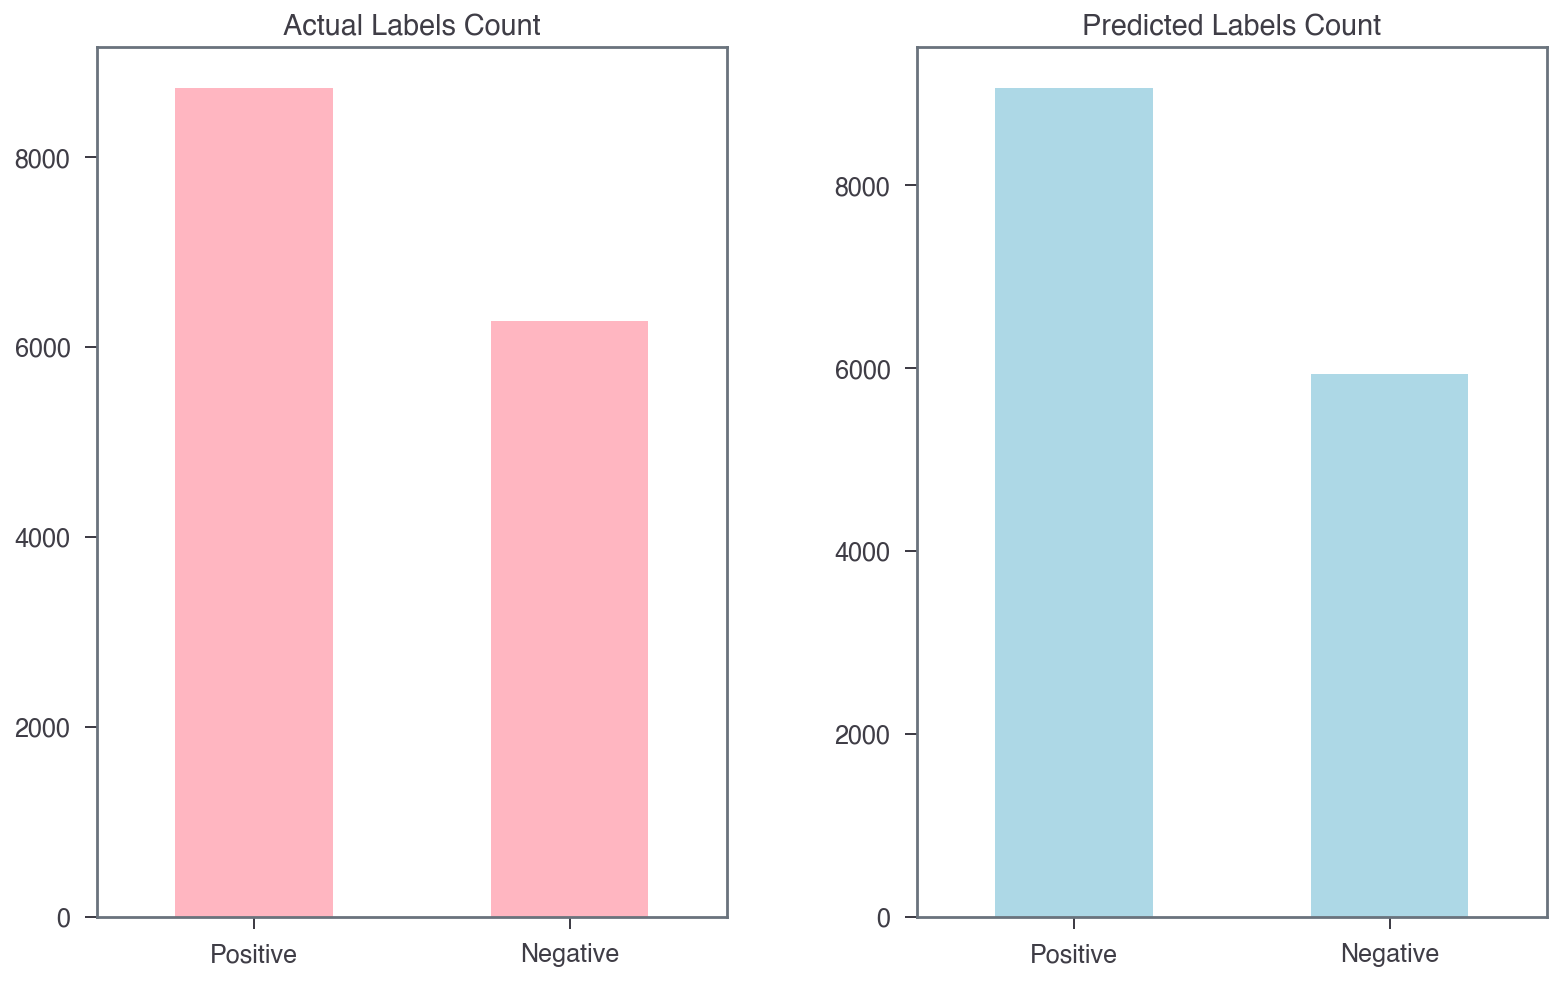

In [206]:
# Same plot as the previous one, but this time ran on the whole DF
fig, axs = plt.subplots(1, 2, figsize = (13, 8))
plt.subplots_adjust(wspace = 0.3)

df['Target'].value_counts().plot(kind = 'bar', rot = 0, ax = axs[0], color = 'lightpink')
axs[0].set_title('Actual Labels Count')

df['Predictions'].value_counts().plot(kind = 'bar', rot = 0, ax = axs[1], color = 'lightblue')
axs[1].set_title('Predicted Labels Count');

## Predictions Function Demo

In [257]:
# Improved function to make the prediction look fancier :D
def predictor(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    
    prediction = find_features(text, most_common)
    
    print('Sentence/Review:', text, '\n')
    
    print('Based on the input you gave me, I classify the sentiment scores as:', 
          '\n - Negative:', scores['neg'], '\n - Neutral:', scores['neu'], '\n - Positive:', scores['pos'])
    
    print('\nAfter all my intensive training, I evaluate this input as:')#, classifier.classify(prediction))
    
    if (scores['neg'] > scores['pos']) and (classifier.classify(prediction) == 'Positive'):
        return 'Negative'
    else:
        return classifier.classify(prediction)


predictor('I think Ironhack is a good company. They have taught us many things in such a small amount of time.\
 However, I think they should increase the time spent teaching ML/Deep Learning/NLP.')

Sentence/Review: I think Ironhack is a good company. They have taught us many things in such a small amount of time. However, I think they should increase the time spent teaching ML/Deep Learning/NLP. 

Based on the input you gave me, I classify the sentiment scores as: 
 - Negative: 0.0 
 - Neutral: 0.833 
 - Positive: 0.167

After all my intensive training, I evaluate this input as:


'Positive'